In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set figure size for charts
figsize_x = 14
figsize_y = 6

In [2]:
# Read climate csv File and store into Pandas data frame
climate_data = pd.read_csv("Climate_dataset2010_2018.csv", encoding = 'unicode_escape')

#drop any nan or empty rows
climate_data = climate_data.dropna()

#display dataframe
climate_data.head()

,Cities,State,Temp High °F,Temp Low °F,Year,Temp High °C,Temp Low °C,Days to 0 °F,Days 32 °F or below,Days rose to 70 °F,Days rose to 90 °F,Precipitation Days,Percipitation Inches,Percipitation Milli­metres,Snow Days,Snow Inches,Snow Centi­metres,weather measurements made at
0,Atlanta,GA,73.0,56.0,2018,23.0,13.0,0.0,30.0,218.0,66.0,140.0,70.1,1780.0,1,2.4,6,Atlanta's HartsfieldJackson International Air...
1,Atlanta,GA,75.0,56.0,2017,24.0,13.0,0.0,24.0,248.0,38.0,121.0,52.5,1334.0,1,2.3,6,Atlanta's HartsfieldJackson International Air...
2,Atlanta,GA,76.0,56.0,2016,24.0,13.0,0.0,29.0,246.0,88.0,88.0,38.7,983.0,0,0.3,1,Atlanta's HartsfieldJackson International Air...
3,Atlanta,GA,73.0,56.0,2015,23.0,13.0,0.0,37.0,241.0,49.0,148.0,68.4,1738.0,0,0.0,0,Atlanta's HartsfieldJackson International Air...
4,Atlanta,GA,72.0,53.0,2014,22.0,11.0,0.0,41.0,217.0,31.0,118.0,47.6,1210.0,2,4.6,12,Atlanta's HartsfieldJackson International Air...


In [3]:
#create dataframe from csv file
climate_data_df = pd.DataFrame(climate_data)

#define a list of column name to analyze
#data_select_col_lst = ["Cities", "State", "Temp High °F", "Temp Low °F", "Year", 
#                       "Days to 0 °F", "Days 32 °F or below", "Days rose to 70 °F", "Days  rose to 90 °F",
#                       "Precipitation Days", "Percipitation Inches", "Snow Days", "Snow Inches"]

data_select_col_lst = ["Cities", "State", "Temp High °F", "Temp Low °F", "Year", 
                       "Precipitation Days", "Percipitation Inches", "Snow Days", "Snow Inches"]

#select the columns needed for dataframe for analysis
climate_data_df = climate_data_df[data_select_col_lst]

#display column type in dataframe
climate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 458
Data columns (total 9 columns):
Cities                  451 non-null object
State                   451 non-null object
Temp High °F            451 non-null float64
Temp Low °F             451 non-null float64
Year                    451 non-null int64
Precipitation Days      451 non-null float64
Percipitation Inches    451 non-null float64
Snow Days               451 non-null int64
Snow Inches             451 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.2+ KB


In [4]:
#some measurement cols are in string and need to convert to numeric
convert_data_select_col_lst = ["Temp High °F", "Temp Low °F", "Precipitation Days", "Percipitation Inches"]
# Iterate over chosen columns
for col in convert_data_select_col_lst:  
    climate_data_df[col] = pd.to_numeric(climate_data_df[col])

#display column type in dataframe
climate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 458
Data columns (total 9 columns):
Cities                  451 non-null object
State                   451 non-null object
Temp High °F            451 non-null float64
Temp Low °F             451 non-null float64
Year                    451 non-null int64
Precipitation Days      451 non-null float64
Percipitation Inches    451 non-null float64
Snow Days               451 non-null int64
Snow Inches             451 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.2+ KB


In [5]:
#get 2018 year climate data

climate_data_df_2018 = climate_data_df.loc[climate_data_df["Year"]== 2018, :]

#groupby State and reset index
#climate_data_df_2018 = climate_data_df_2018.reset_index()
climate_data_df_2018 = climate_data_df_2018.groupby(['State']).median()

#display dataframe
climate_data_df_2018.head(40)


,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches
State,,,,,,,
AL,75.0,55.0,2018.0,129.0,61.10,0.0,0.00
AZ,88.0,65.0,2018.0,33.0,9.30,0.0,0.00
CA,76.0,55.0,2018.0,28.0,8.90,0.0,0.00
CO,66.0,37.0,2018.0,71.0,11.70,71.0,26.80
CT,61.0,42.0,2018.0,150.0,62.80,11.0,54.50
DC,68.0,52.0,2018.0,131.0,66.30,2.0,7.30
FL,84.0,68.0,2018.0,136.0,61.50,0.0,0.00
GA,73.0,56.0,2018.0,140.0,70.10,1.0,2.40
IL,60.0,44.0,2018.0,154.0,44.10,14.0,43.30


In [6]:
#sort climate_data_df_2018 by highest temp
climate_data_df_2018_sorted = climate_data_df_2018.sort_values(by=['Temp High °F', 'Percipitation Inches', 'Snow Inches'])
climate_data_df_2018_sorted.head(40)

,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches
State,,,,,,,
MN,55.0,38.0,2018.0,118.0,33.60,21.0,82.40
WI,56.0,41.0,2018.0,135.0,45.10,13.0,50.10
NY,59.0,42.0,2018.0,176.0,41.70,30.0,105.90
MI,60.0,43.0,2018.0,143.0,43.90,14.0,45.80
IL,60.0,44.0,2018.0,154.0,44.10,14.0,43.30
MA,60.0,46.0,2018.0,143.0,53.30,10.0,51.00
CT,61.0,42.0,2018.0,150.0,62.80,11.0,54.50
RI,61.0,44.0,2018.0,137.0,63.50,10.0,49.80
WA,62.0,47.0,2018.0,158.0,35.80,1.0,1.00


In [7]:
climate_data_df_2018_sorted = climate_data_df_2018_sorted.reset_index()
climate_data_df_2018_sorted.head(40)

,State,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches
0,MN,55.0,38.0,2018.0,118.0,33.60,21.0,82.40
1,WI,56.0,41.0,2018.0,135.0,45.10,13.0,50.10
2,NY,59.0,42.0,2018.0,176.0,41.70,30.0,105.90
3,MI,60.0,43.0,2018.0,143.0,43.90,14.0,45.80
4,IL,60.0,44.0,2018.0,154.0,44.10,14.0,43.30
5,MA,60.0,46.0,2018.0,143.0,53.30,10.0,51.00
6,CT,61.0,42.0,2018.0,150.0,62.80,11.0,54.50
7,RI,61.0,44.0,2018.0,137.0,63.50,10.0,49.80
8,WA,62.0,47.0,2018.0,158.0,35.80,1.0,1.00
9,IN,63.0,45.0,2018.0,128.0,44.10,4.0,20.30


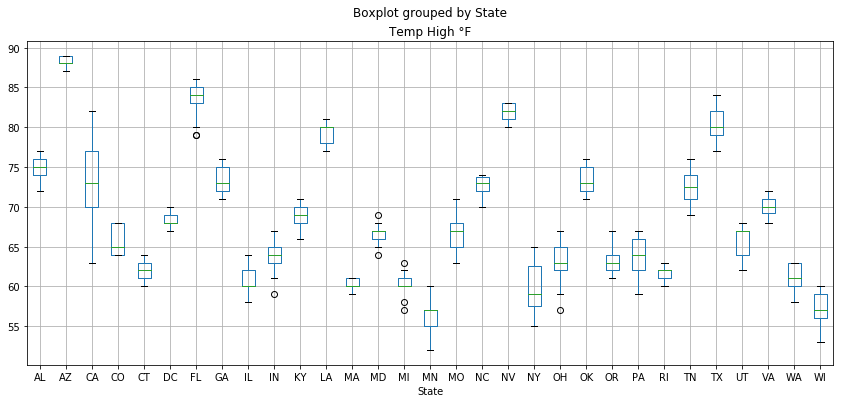

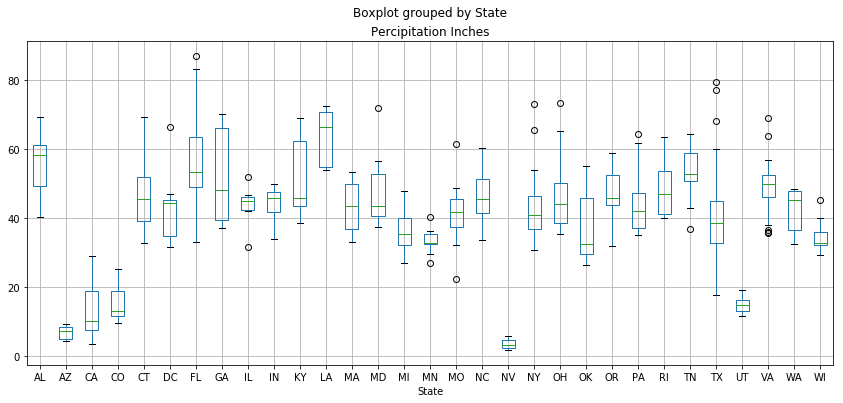

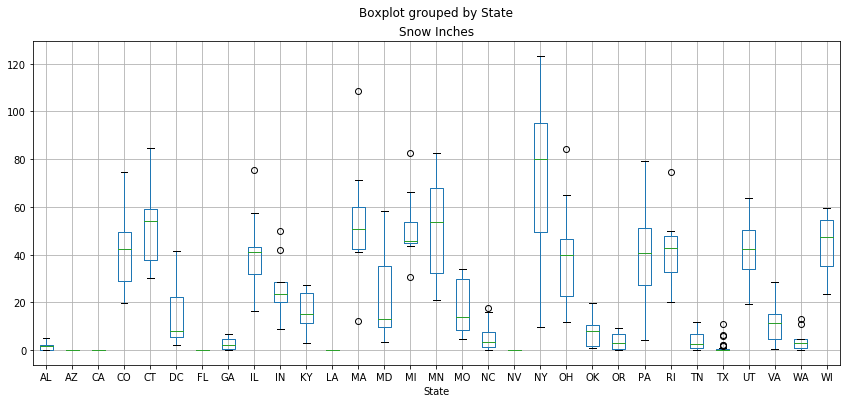

In [8]:
# Create a boxplots to visualize the spread for each
climate_data_df.boxplot("Temp High °F", by="State", figsize=(figsize_x, figsize_y))
climate_data_df.boxplot("Percipitation Inches", by="State", figsize=(figsize_x, figsize_y))
climate_data_df.boxplot("Snow Inches", by="State", figsize=(figsize_x, figsize_y))

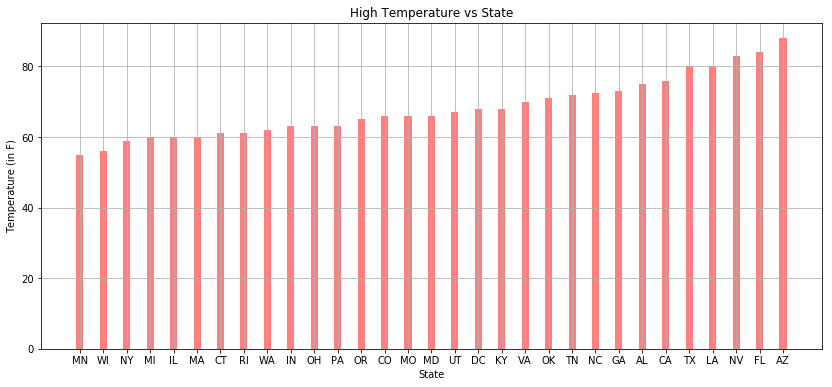

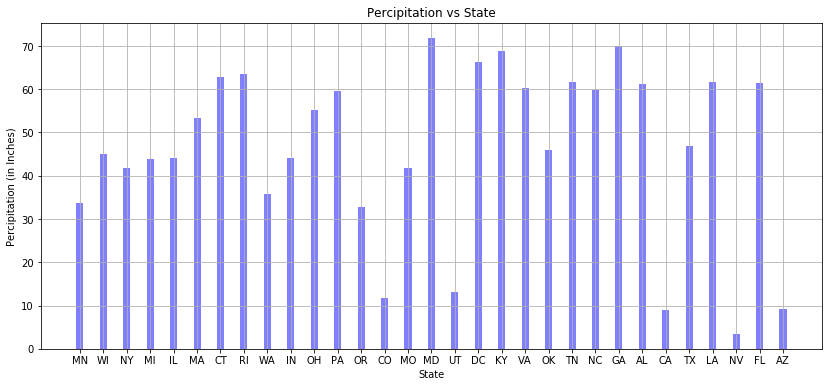

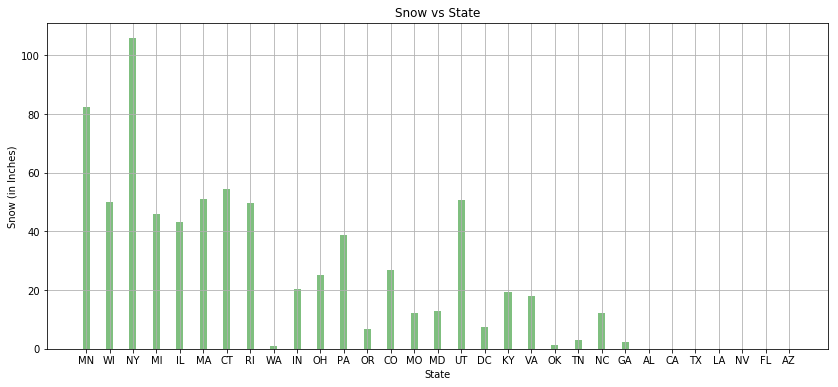

In [9]:
#setting bar stick width
width = 0.3

#plot High Temperature in F degree as bar chart
fig, ax1 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.title('High Temperature vs State')
ax1.grid()
ax1.set_xlabel("State")
ax1.set_ylabel("Temperature (in F)")
percipitation = ax1.bar(climate_data_df_2018_sorted['State'], 
        climate_data_df_2018_sorted['Temp High °F'], 
        width=width, align='center', alpha=0.5, color='r')

#plot Percipitation in Inches as bar chart
fig, ax2 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.title("Percipitation vs State")
ax2.grid()
ax2.set_xlabel("State")
ax2.set_ylabel("Percipitation (in Inches)")
percipitation = ax2.bar(climate_data_df_2018_sorted['State'], 
        climate_data_df_2018_sorted['Percipitation Inches'], 
        width=width, align='center', alpha=0.5, color='b')

#plot Snow in Inches as bar chart
fig, ax3 = plt.subplots(figsize=(figsize_x, figsize_y))
plt.title("Snow vs State")
ax3.grid()
ax3.set_xlabel("State")
ax3.set_ylabel("Snow (in Inches)")
snow = ax3.bar(climate_data_df_2018_sorted['State'], 
        climate_data_df_2018_sorted['Snow Inches'], 
        width=width, align='center', alpha=0.5, color='g')

plt.show()

In [26]:
#Weight Summed Analysis to rank climate
no_of_metrics = 4
metric_weightage = 1/no_of_metrics
temphigh_median = climate_data_df_2018_sorted['Temp High °F'].median()
templow_max = climate_data_df_2018_sorted['Temp Low °F'].median()
percipitation_max = climate_data_df_2018_sorted['Percipitation Inches'].median()
snow_min = min(climate_data_df_2018_sorted['Snow Inches'])

#handle if snow_min = 0 to set to 1 to avoid division error
if snow_min == 0:
    snow_min = 1
climate_data_df_2018_sorted['Temp High WSA'] = climate_data_df_2018_sorted['Temp High °F']/temphigh_median*metric_weightage
climate_data_df_2018_sorted['Temp Low WSA'] = climate_data_df_2018_sorted['Temp Low °F']/templow_max*metric_weightage
climate_data_df_2018_sorted['Percipitation Inches WSA'] = climate_data_df_2018_sorted['Percipitation Inches']/percipitation_max*metric_weightage
climate_data_df_2018_sorted['Snow Inches WSA'] = climate_data_df_2018_sorted['Snow Inches']/snow_min*metric_weightage
climate_data_df_2018_sorted['Total WSA'] = climate_data_df_2018_sorted['Temp High WSA']+climate_data_df_2018_sorted['Temp Low WSA']+climate_data_df_2018_sorted['Percipitation Inches WSA']+climate_data_df_2018_sorted['Snow Inches WSA']

In [29]:
climate_data_df_2018_sorted.head()

,State,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Temp High WSA,Temp Low WSA,Percipitation Inches WSA,Snow Inches WSA,Total WSA
0,MN,55.0,38.0,2018.0,118.0,33.6,21.0,82.4,0.208333,0.202128,0.179296,20.600,21.189757
1,WI,56.0,41.0,2018.0,135.0,45.1,13.0,50.1,0.212121,0.218085,0.240662,12.525,13.195868
2,NY,59.0,42.0,2018.0,176.0,41.7,30.0,105.9,0.223485,0.223404,0.222519,26.475,27.144408
3,MI,60.0,43.0,2018.0,143.0,43.9,14.0,45.8,0.227273,0.228723,0.234258,11.450,12.140254
4,IL,60.0,44.0,2018.0,154.0,44.1,14.0,43.3,0.227273,0.234043,0.235326,10.825,11.521641


In [28]:
#Sort table by Total WSA to pick top 20 states
climate_data_df_2018_sorted_wsa = climate_data_df_2018_sorted.sort_values(by=['Total WSA'])

#show sorted table by WSA
climate_data_df_2018_sorted_wsa.head(40)

,State,Temp High °F,Temp Low °F,Year,Precipitation Days,Percipitation Inches,Snow Days,Snow Inches,Temp High WSA,Temp Low WSA,Percipitation Inches WSA,Snow Inches WSA,Total WSA
25,CA,76.0,55.0,2018.0,28.0,8.90,0.0,0.00,0.287879,0.292553,0.047492,0.0000,0.627924
28,NV,83.0,62.0,2018.0,20.0,3.40,0.0,0.00,0.314394,0.329787,0.018143,0.0000,0.662324
30,AZ,88.0,65.0,2018.0,33.0,9.30,0.0,0.00,0.333333,0.345745,0.049626,0.0000,0.728704
26,TX,80.0,60.0,2018.0,101.5,46.85,0.0,0.00,0.303030,0.319149,0.250000,0.0000,0.872179
24,AL,75.0,55.0,2018.0,129.0,61.10,0.0,0.00,0.284091,0.292553,0.326041,0.0000,0.902685
8,WA,62.0,47.0,2018.0,158.0,35.80,1.0,1.00,0.234848,0.250000,0.191035,0.2500,0.925884
27,LA,80.0,64.0,2018.0,139.0,61.60,0.0,0.00,0.303030,0.340426,0.328709,0.0000,0.972164
29,FL,84.0,68.0,2018.0,136.0,61.50,0.0,0.00,0.318182,0.361702,0.328175,0.0000,1.008059
20,OK,71.0,49.0,2018.0,84.0,45.90,0.0,1.30,0.268939,0.260638,0.244931,0.3250,1.099508
23,GA,73.0,56.0,2018.0,140.0,70.10,1.0,2.40,0.276515,0.297872,0.374066,0.6000,1.548454
